<a href="https://colab.research.google.com/github/muhammedafsalpm/ICT-Academy-of-Kerala/blob/main/Muh_Afsal_P_M_Assignment_05_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [146]:
import pandas as pd
import numpy as np

1. Read the dataset to python environment

In [147]:
df = pd.read_excel('/content/iris.xls')
df.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


2. Do the necessary pre-processing steps

In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [149]:
df.shape

(150, 5)

In [150]:
df.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [151]:
df.isna().sum()

,0
SL,7
SW,6
PL,6
PW,0
Classification,0


In [152]:
df['Classification'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [153]:
for i in ['SL','SW','PL','PW']:
  df[i] = df[i].fillna(df[i].mean()) # Here missing values are filled with mean value
  print(df[i].isna().sum())

0
0
0
0


In [154]:
from matplotlib import pyplot as plt

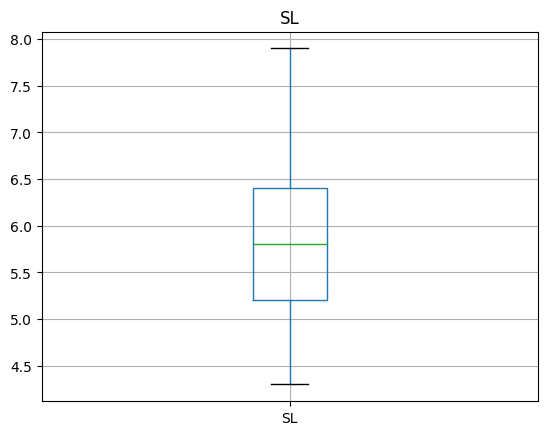

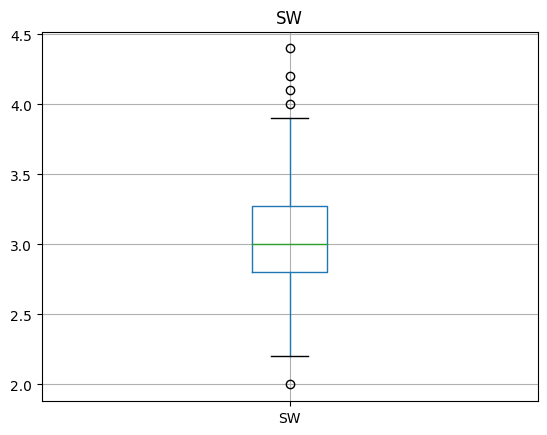

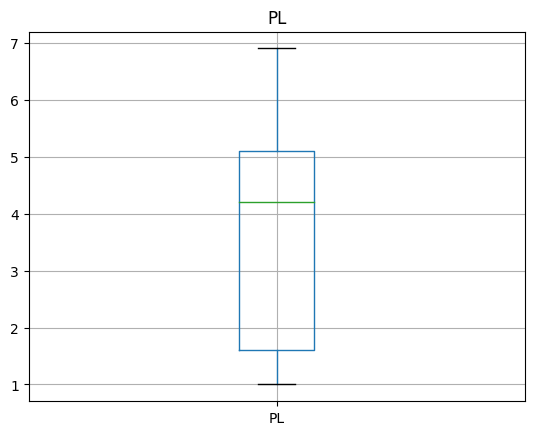

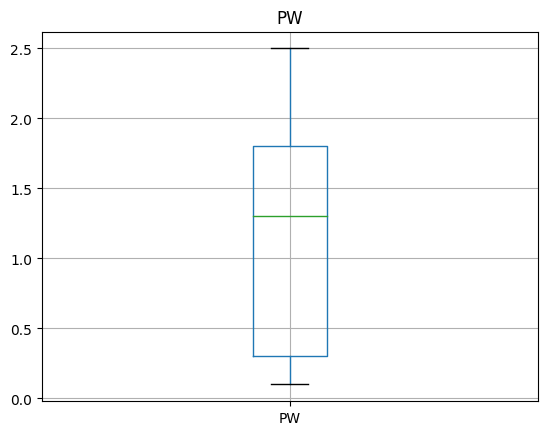

In [155]:
#To find outlier
for col in df.columns:
  if df[col].dtype!='object':
    plt.figure()
    df.boxplot([col])
    plt.title(col)

In [156]:
# To deal Outliers IQR Method

for col in df.columns:
  if df[col].dtype!='object':
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)

    # To find IQR
    iqr = q3-q1

    #Upper & Lower bound
    upper = q3+(1.5*iqr)
    lower = q1-(1.5*iqr)

    df[col] = np.where(df[col]>upper,upper,df[col])
    df[col] = np.where(df[col]<lower,lower,df[col])

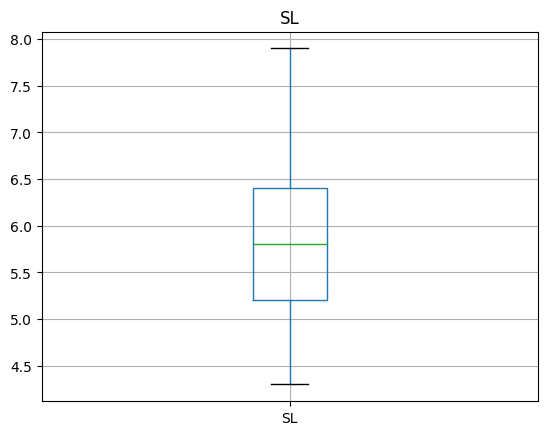

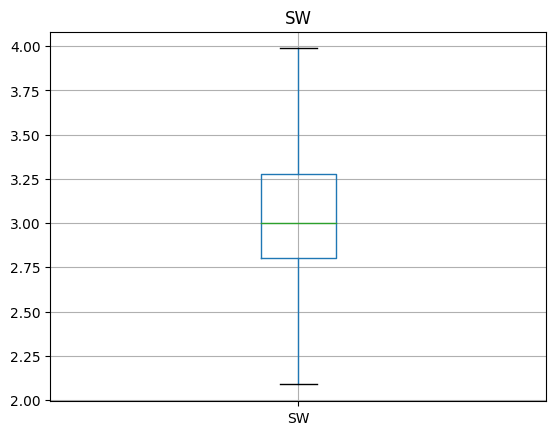

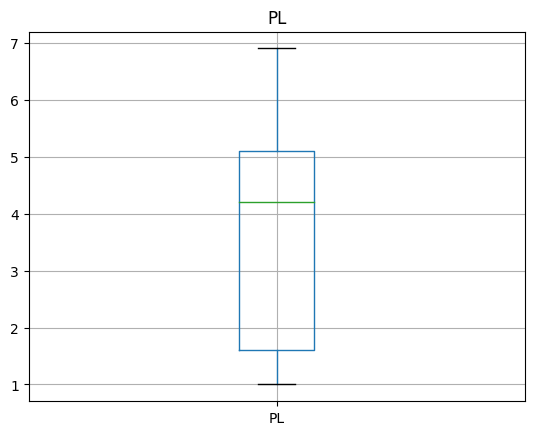

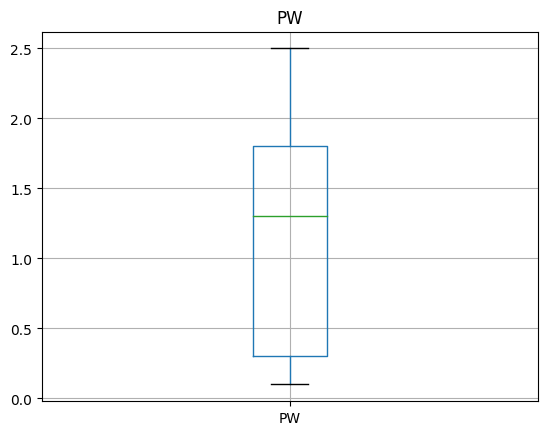

In [157]:
#To find outlier
for col in df.columns:
  if df[col].dtype!='object':
    plt.figure()
    df.boxplot([col])
    plt.title(col)

In [158]:
df.head()

,SL,SW,PL,PW,Classification
0,5.100000,3.5,1.4,0.2,Iris-setosa
1,4.900000,3.0,1.4,0.2,Iris-setosa
2,5.855944,3.2,1.3,0.2,Iris-setosa
3,4.600000,3.1,1.5,0.2,Iris-setosa
4,5.000000,3.6,1.4,0.2,Iris-setosa


In [159]:
#Scaling

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [160]:
columns_to_scale = ['SL','SW','PL','PW']
for col in columns_to_scale:
  df[col] = scaler.fit_transform(df[[col]])


In [161]:
df.head()

,SL,SW,PL,PW,Classification
0,-0.938151,1.121412,-1.370138,-1.312977,Iris-setosa
1,-1.186357,-0.110608,-1.370138,-1.312977,Iris-setosa
2,0.000000,0.382200,-1.428287,-1.312977,Iris-setosa
3,-1.558667,0.135796,-1.311989,-1.312977,Iris-setosa
4,-1.062254,1.367816,-1.370138,-1.312977,Iris-setosa


In [162]:
# Encoding apply to classification column

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['Classification'] = encoder.fit_transform(df['Classification'])
df.head()

,SL,SW,PL,PW,Classification
0,-0.938151,1.121412,-1.370138,-1.312977,0
1,-1.186357,-0.110608,-1.370138,-1.312977,0
2,0.000000,0.382200,-1.428287,-1.312977,0
3,-1.558667,0.135796,-1.311989,-1.312977,0
4,-1.062254,1.367816,-1.370138,-1.312977,0


In [163]:
 # For prediction split columns
x = df.drop('Classification',axis=1)
y = df['Classification']

In [164]:
x.head()

,SL,SW,PL,PW
0,-0.938151,1.121412,-1.370138,-1.312977
1,-1.186357,-0.110608,-1.370138,-1.312977
2,0.000000,0.382200,-1.428287,-1.312977
3,-1.558667,0.135796,-1.311989,-1.312977
4,-1.062254,1.367816,-1.370138,-1.312977


In [165]:
y.head()

,Classification
0,0
1,0
2,0
3,0
4,0


In [166]:
#Data Spliting

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [167]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120,), (30,))

3. Find out which classification model gives the best result (try all the
classification algorithms discussed in the session)

**1. Linear Regression**

In [168]:
from sklearn.linear_model import LogisticRegression
logit_model = LogisticRegression()
logit_model.fit(x_train,y_train)
y_pred = logit_model.predict(x_test)

In [169]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Print metrics
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision (macro):', precision_score(y_test, y_pred, average='macro'))
print('Recall (macro):', recall_score(y_test, y_pred, average='macro'))
print('F1 Score (macro):', f1_score(y_test, y_pred, average='macro'))


Accuracy: 0.9666666666666667
Precision (macro): 0.9722222222222222
Recall (macro): 0.9629629629629629
F1 Score (macro): 0.9658994032395567


**2. K-Nearest Neighbour**

In [170]:
from sklearn.neighbors import KNeighborsClassifier
metric_k = []
neighbors = np.arange(3,15) #to find best kvalue
for k in neighbors:
  classifier = KNeighborsClassifier(n_neighbors=k,metric='minkowski',p=2)
  classifier.fit(x_train,y_train)
  y_pred = classifier.predict(x_test)
  acc = accuracy_score(y_test,y_pred)
  metric_k.append(acc)

In [171]:
'''plt.plot(neighbors,metric_k,'o-')
plt.xlabel('K Values')
plt.ylabel('Accuracy')
plt.grid()'''

"plt.plot(neighbors,metric_k,'o-')\nplt.xlabel('K Values')\nplt.ylabel('Accuracy')\nplt.grid()"

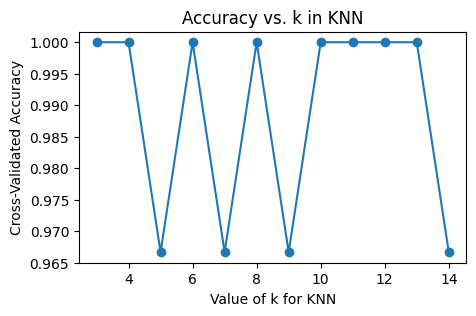

Best k value: 3 with accuracy: 1.000


In [172]:
# Plot the k values vs. accuracy
plt.figure(figsize=(5, 3))
plt.plot(neighbors, metric_k, 'o-')
plt.xlabel('Value of k for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.title('Accuracy vs. k in KNN')
plt.show()

# Find the best k value
best_k = neighbors[np.argmax(metric_k)]
print(f"Best k value: {best_k} with accuracy: {max(metric_k):.3f}")

In [173]:
  classifier = KNeighborsClassifier(n_neighbors=3,metric='minkowski',p=2) # Here apply k value as 3
  classifier.fit(x_train,y_train)
  y_pred = classifier.predict(x_test)
  acc = accuracy_score(y_test,y_pred)

In [174]:
print('Accuracy is',accuracy_score(y_test,y_pred))
print('Precision (macro):', precision_score(y_test, y_pred, average='macro'))
print('Recall (macro):', recall_score(y_test, y_pred, average='macro'))
print('F1 Score (macro):', f1_score(y_test, y_pred, average='macro'))

Accuracy is 1.0
Precision (macro): 1.0
Recall (macro): 1.0
F1 Score (macro): 1.0


**3. SVM**

In [175]:
from sklearn.svm import SVC
sv_clf = SVC()
sv_clf.fit(x_train,y_train)
y_pred = sv_clf.predict(x_test)

In [176]:
print('Accuracy is',accuracy_score(y_test,y_pred))
print('Precision (macro):', precision_score(y_test, y_pred, average='macro'))
print('Recall (macro):', recall_score(y_test, y_pred, average='macro'))
print('F1 Score (macro):', f1_score(y_test, y_pred, average='macro'))

Accuracy is 0.9666666666666667
Precision (macro): 0.9722222222222222
Recall (macro): 0.9629629629629629
F1 Score (macro): 0.9658994032395567


**4. Decision Tree**

In [177]:
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(x_train,y_train)
y_pred = dt_clf.predict(x_test)

In [178]:
print('Accuracy is',accuracy_score(y_test,y_pred))
print('Precision (macro):', precision_score(y_test, y_pred, average='macro'))
print('Recall (macro):', recall_score(y_test, y_pred, average='macro'))
print('F1 Score (macro):', f1_score(y_test, y_pred, average='macro'))

Accuracy is 1.0
Precision (macro): 1.0
Recall (macro): 1.0
F1 Score (macro): 1.0


**5. Random Forest**

In [179]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=100,random_state=42)
rf_clf.fit(x_train,y_train)
y_pred = rf_clf.predict(x_test)

In [180]:
print('Accuracy is',accuracy_score(y_test,y_pred))
print('Precision (macro):', precision_score(y_test, y_pred, average='macro'))
print('Recall (macro):', recall_score(y_test, y_pred, average='macro'))
print('F1 Score (macro):', f1_score(y_test, y_pred, average='macro'))

Accuracy is 1.0
Precision (macro): 1.0
Recall (macro): 1.0
F1 Score (macro): 1.0


Summary of Model Performance:

**Logistic Regression**

Accuracy: 0.967
Precision (macro): 0.972
Recall (macro): 0.963
F1 Score (macro): 0.966


**k-Nearest Neighbors (KNN)**

Accuracy: 1.0
Precision (macro): 1.0
Recall (macro): 1.0
F1 Score (macro): 1.0


**Support Vector Machine (SVM)**

Accuracy: 0.967
Precision (macro): 0.972
Recall (macro): 0.963
F1 Score (macro): 0.966


**Decision Tree**

Accuracy: 1.0
Precision (macro): 1.0
Recall (macro): 1.0
F1 Score (macro): 1.0


**Random Forest**

Accuracy: 1.0
Precision (macro): 1.0
Recall (macro): 1.0
F1 Score (macro): 1.0


**Best Model:**

The **k-Nearest Neighbors (KNN), Decision Tree, and Random Forest** models are the best-performing models, achieving perfect scores across all metrics.